In [211]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import time

def to3D(site,L):
    z = site//(L*L)
    sitexy = site - (z*L*L)
    y = sitexy%L
    x = sitexy//L
    return z,x,y

def init(N,L):
    """returns a list of N occupied sites and an LxL lattice with 0's for
       empty sites and integers >0 corresponding to non-empty sites. """
    lattice = numpy.zeros((L,L,L),dtype=numpy.int8)#Initialize empty lattice
    occupied = numpy.random.choice(L*L*L,N,replace=False)
    for i,site in enumerate(occupied):
        z,x,y = to3D(site,L) # this finds the z,y,x coordinate of the site wrt the site number
        lattice[z][x][y] = i+1 # this find the site we are talking about, find its x,y,z and put a 1 in the corresponding place
    return occupied, lattice
        
def adjacent(site,L):
    """Return a tuple with indices corresponding to the four sites adjacent
       to the one passed in, wrapping around a LxL periodic volume."""
    z,x,y = to3D(site,L) # this finds the z,y,x coordinate of the site wrt the site number
    
    zscale = z*L*L
    xyscale = site - zscale
    
    left = ((y - 1 + L) % L) + (x*L) + zscale
    right = ((y + 1) % L) + (x*L) + zscale
    up =  ((x - 1 + L) % L)*L + y + zscale
    down =  ((x + 1) % L)*L + y + zscale
    front = ((z + L + 1) % L)*L*L + xyscale
    back =  ((z + L - 1 ) % L)*L*L + xyscale
    return (right, down, front, left, up , back)
    
def energy(occupied,lattice,epsilon=-1):
    """Returns the total potential energy for the occupied sites on a lattice."""
    U = 0
    L = len(lattice)
    for site in occupied: #loop over all sites
        for neighbor in adjacent(site,L)[:3]: #Look right,down, front to avoid double counting
            z,x,y = to3D(neighbor,L) # this finds the z,y,x coordinate of the site wrt the site number
            if lattice[neighbor//(L*L)][(neighbor-(z*L*L))//L][(neighbor-(z*L*L))%L] != 0:
                U+=epsilon
                
    return U

def trial_move(occupied,lattice,T):
    L=len(lattice)
    V = L*L*L
    Uo = energy(occupied,lattice)
    numpy.random.shuffle(occupied) #shuffles the elements of occupied
    old = occupied[0]
    empty_mask = numpy.isin(numpy.arange(V),occupied,invert=True)
    empty_sites = numpy.arange(V)[empty_mask] # list of empty sites
    new = empty_sites[numpy.random.randint(len(empty_sites))]
    occupied[0]= new
    zn,xn,yn = to3D(new,L)
    zo,xo,yo = to3D(old,L)
    lattice[zn][xn][yn] = lattice[zo][xo][yo]
    lattice[zo][xo][yo] = 0
    Un = energy(occupied,lattice)
    if (Un<=Uo) or numpy.random.random() < numpy.exp(-(Un-Uo)/T):
        return occupied, lattice, Un
    lattice[zo][xo][yo] = lattice[zn][xn][yn]
    lattice[zn][xn][yn] = 0
    occupied[0]=old
    return occupied, lattice, Uo

def run(nsteps,T,occupied, lattice):
    U = []
    for step in range(int(nsteps)):
        occupied, lattice, u = trial_move(occupied, lattice,T)
        U.append(u)
    return numpy.array(U)/len(occupied)

def analyze(data):
    a = numpy.average(data)
    s = numpy.std(data)
    return a,s

In [213]:
Temps = numpy.linspace(0.1,1.3,num=len(times)) # Interesting range of temperatures to control movement of N particles
Sizes = range(10,100,10) # Sets our N values with (start,stop,resolution)
results = {}
for N in Sizes: # Every 10 steps, print results to look at
    onerun = []
    print(N)
    for T in Temps:
        print("\t",T)
        occupied, lattice = init(N,N) # N, L
        start = time.time()
        U = run(1e3,T,occupied, lattice)
        a, s = analyze(U)
        finish = time.time()
        onerun.append((a,s,finish-start))
        results[N] =  numpy.array(onerun)

10
	 0.1
	 0.22
	 0.33999999999999997
	 0.45999999999999996
	 0.58
	 0.7
	 0.82
	 0.94
	 1.06
	 1.1800000000000002
	 1.3
20
	 0.1
	 0.22
	 0.33999999999999997
	 0.45999999999999996
	 0.58
	 0.7
	 0.82
	 0.94
	 1.06
	 1.1800000000000002
	 1.3
30
	 0.1
	 0.22
	 0.33999999999999997
	 0.45999999999999996
	 0.58
	 0.7
	 0.82
	 0.94
	 1.06
	 1.1800000000000002
	 1.3
40
	 0.1
	 0.22
	 0.33999999999999997
	 0.45999999999999996
	 0.58
	 0.7
	 0.82
	 0.94
	 1.06
	 1.1800000000000002
	 1.3
50
	 0.1
	 0.22
	 0.33999999999999997
	 0.45999999999999996
	 0.58
	 0.7
	 0.82
	 0.94
	 1.06
	 1.1800000000000002
	 1.3
60
	 0.1
	 0.22
	 0.33999999999999997
	 0.45999999999999996
	 0.58
	 0.7
	 0.82
	 0.94
	 1.06
	 1.1800000000000002
	 1.3
70
	 0.1
	 0.22
	 0.33999999999999997
	 0.45999999999999996
	 0.58
	 0.7
	 0.82
	 0.94
	 1.06
	 1.1800000000000002
	 1.3
80
	 0.1
	 0.22
	 0.33999999999999997
	 0.45999999999999996
	 0.58
	 0.7
	 0.82
	 0.94
	 1.06
	 1.1800000000000002
	 1.3
90
	 0.1
	 0.22
	 0.339999999999

Text(0.5, 1.0, 'Time to Complete Simulation compared to N particles at V=125')

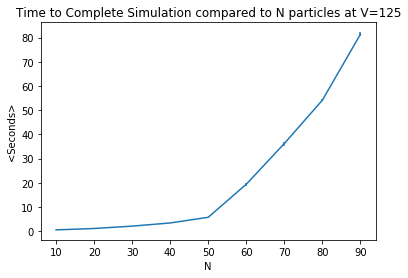

In [215]:
times = []
for N in Sizes:
    times.append((numpy.average(results[N][:,2]),numpy.std(results[N][:,2])))
times = numpy.array(times)
plt.errorbar(Sizes,times[:,0],times[:,1])
plt.xlabel("N")
plt.ylabel("<Seconds>")
plt.title('Time to Complete Simulation compared to N particles at V=125')

Text(0, 0.5, '<U>')

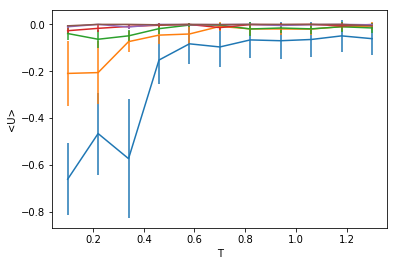

In [347]:
plt.errorbar(Temps,results[10][:,0],results[10][:,1])
plt.errorbar(Temps,results[20][:,0],results[20][:,1])
plt.errorbar(Temps,results[30][:,0],results[30][:,1])
plt.errorbar(Temps,results[50][:,0],results[50][:,1])
plt.errorbar(Temps,results[70][:,0],results[70][:,1])
plt.errorbar(Temps,results[90][:,0],results[90][:,1])
plt.xlabel("T")
plt.ylabel("<U>")


In [360]:
# The purpose of this assignment is to develop data handling skills around statistical information.
# The two files are PE/N data from 1D MC simulations with N=25, V=50, at T=1.0 or T=0.1.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
def autocorr1D(array):
    '''Takes in a linear numpy array, performs autocorrelation
       function and returns normalized array with half the length 
       of the input'''
    ft = numpy.fft.rfft(array-numpy.average(array)) 
    acorr = numpy.fft.irfft(ft*numpy.conjugate(ft))/(len(array)*numpy.var(array))
    return acorr[0:len(acorr)//2]


How many statistically independent samples can we extract from each of these data sets?
ac1 = autocorr1D(results[10][:,0])
ac2 = autocorr1D(results[30][:,0])
ac3 = autocorr1D(results[50][:,0])
ac4 = autocorr1D(results[70][:,0])
ac5 = autocorr1D(results[90][:,0])
dt1 = numpy.argwhere(ac1<0)[0][0] #the 0th element of argwhere is a list containing the index of the first element <0, so we use [0] of that to get the value itself
dt2 = numpy.argwhere(ac2<0)[0][0]
dt3 = numpy.argwhere(ac3<0)[0][0]
dt4 = numpy.argwhere(ac4<0)[0][0]
dt5 = numpy.argwhere(ac5<0)[0][0]
free1 = len(results[10][:,0])//dt1
free2 = len(results[30][:,0])//dt2
free3 = len(results[50][:,0])//dt3
free4 = len(results[70][:,0])//dt4
free5 = len(results[90][:,0])//dt5
print(free1)
print(free2)
print(free3)
print(free4)
print(free5)
print('looks like the run that has 70 produces the best set')

Object `sets` not found.
3
5
5
11
5
looks like the run that has 70 produces the best set


Text(0, 0.5, 'T')

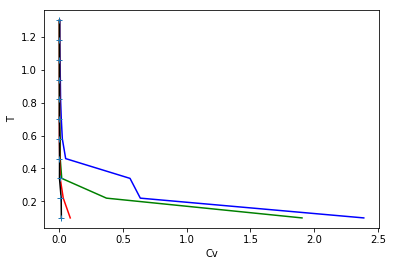

In [344]:
# Cv
Cv = {}
for N in Sizes:
    cvonerun = []
    for i,T in enumerate(Temps):
        cv = (1/T**2)*((numpy.square(results[N][i,1])))
        cvonerun.append(cv)
        Cv[N] = numpy.array(cvonerun)

plt.plot(Cv[10][:],Temps,'b')
plt.plot(Cv[20][:],Temps,'g')
plt.plot(Cv[30][:],Temps,'r')
plt.plot(Cv[40][:],Temps,'k')
plt.plot(Cv[50][:],Temps,'+')
plt.xlabel("Cv")
plt.ylabel("T")
print('I recognize that I should probably divide each of the U terms by the independent sample size, but Ive just run low on time ')

In [361]:
def pbc(d,L):
    return d - L * ((d+L/2)//L)

dr = 0.01
def rdf(coords,L,dr):
    rmax = L/2
    nbins = int(rmax//dr)
    r = numpy.array([i*dr for i in range(nbins)])    
    bins = numpy.zeros(nbins)
    for i,a in enumerate(coords[:-1]):#all but the last
        for b in coords[i+1:]:
            delta = b-a
            for h in range(3):
                delta[h] = pbc(delta[h],L)
            d = numpy.absolute(numpy.linalg.norm(delta))
            index = int(d//dr)
            if index<nbins:
                bins[index] += 1 
    for i, b in enumerate(bins):
        bins[i] /= N*(N-1)*numpy.pi*(4*numpy.square(dr*(i+1))*dr)/(2*V) #normalize by volume of annulus AND number of pairs
    #Note: Number of Pairs is N*(N-1)/2 (Sum of numbers from 1 to N-1)    
    return r, bins
print(bins[i])
r,bins = rdf(occupied, 5, dr)
plt.plot(r,bins)
plt.xlim([0,5])
plt.ylim([0,5])
plt.show()

NameError: name 'bins' is not defined

In [ ]:
# THE REST OF THE CELLS ARE JUST SCRATCH WORK
# THE REST OF THE CELLS ARE JUST SCRATCH WORK
# THE REST OF THE CELLS ARE JUST SCRATCH WORK
# THE REST OF THE CELLS ARE JUST SCRATCH WORK
# THE REST OF THE CELLS ARE JUST SCRATCH WORK

In [ ]:
from mpl_toolkits.mplot3d import axes3d
#visualize
print(occupied)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(occupied[:,0],occupied[:,1],occupied[:,2])
ax.set_xlim3d(0,L)
ax.set_ylim3d(0,L)
ax.set_zlim3d(0,L)


In [278]:
# Cv
Cv = {}
for N in Sizes:
    print(N)
    print('')
    for i,T in enumerate(Temps):
        print(results[N][i,0])
        print((numpy.square(results[N][i,0])))
        print(T)
        print((numpy.square(results[N][i,1])))
        print(((results[N][i,1])))
        cv = (1/T**2)*((numpy.square(results[N][i,0])))
        Cv.append(cv)

10

-0.6610999999999999
0.43705320999999986
0.1
0.023896790000000008
0.154585866106834


AttributeError: 'dict' object has no attribute 'append'

In [ ]:
# Cv
Cv = {}
for N in Sizes:
    cvonerun = []
    #Cv[N] = numpy.array(cvonerun)
    for i,T in enumerate(Temps):
        cv = (1/T**2)*((numpy.square(results[N][i,1])))
        cvonerun.append(cv)
        Cv[N] = numpy.array(cvonerun)
        

print(Cv)
print(Cv[10][:])


In [169]:
Temps = numpy.arange(0.1,1.3,0.1) # Interesting range of temperatures to control movement of N particles MAKE THIS LEN=LEN(TIME)
Length = range(2,14,1) # Sets our N values with (start,stop,resolution)
results = {}
for L in Length: # Every 1 length change, print results to look at
    onerun = []
    print(L)
    for T in Temps:
        print("\t",T)
        occupied, lattice = init((L*L*L)//4,L) # N to be a quater of the volume always. Fixed density, L
        start = time.time()
        U = run(1e3,T,occupied, lattice)
        a, s = analyze(U)
        finish = time.time()
        onerun.append((a,s,finish-start))
        results[L] =  numpy.array(onerun)

2
	 0.1
	 0.2
	 0.30000000000000004
	 0.4
	 0.5
	 0.6
	 0.7000000000000001
	 0.8
	 0.9
	 1.0
	 1.1
	 1.2000000000000002
3
	 0.1
	 0.2
	 0.30000000000000004
	 0.4
	 0.5
	 0.6
	 0.7000000000000001
	 0.8
	 0.9
	 1.0
	 1.1
	 1.2000000000000002
4
	 0.1
	 0.2
	 0.30000000000000004
	 0.4
	 0.5
	 0.6
	 0.7000000000000001
	 0.8
	 0.9
	 1.0
	 1.1
	 1.2000000000000002
5
	 0.1
	 0.2
	 0.30000000000000004
	 0.4
	 0.5
	 0.6
	 0.7000000000000001
	 0.8
	 0.9
	 1.0
	 1.1
	 1.2000000000000002
6
	 0.1
	 0.2
	 0.30000000000000004
	 0.4
	 0.5
	 0.6
	 0.7000000000000001
	 0.8
	 0.9
	 1.0
	 1.1
	 1.2000000000000002
7
	 0.1
	 0.2
	 0.30000000000000004
	 0.4
	 0.5
	 0.6
	 0.7000000000000001
	 0.8
	 0.9
	 1.0
	 1.1
	 1.2000000000000002
8
	 0.1
	 0.2
	 0.30000000000000004
	 0.4
	 0.5
	 0.6
	 0.7000000000000001
	 0.8
	 0.9
	 1.0
	 1.1
	 1.2000000000000002
9
	 0.1
	 0.2
	 0.30000000000000004
	 0.4
	 0.5
	 0.6
	 0.7000000000000001
	 0.8
	 0.9
	 1.0
	 1.1
	 1.2000000000000002
10
	 0.1
	 0.2
	 0.30000000000000004
	 0

Text(0.5, 1.0, 'Time to Complete Simulation compared to V from L^3 at density = 1/4')

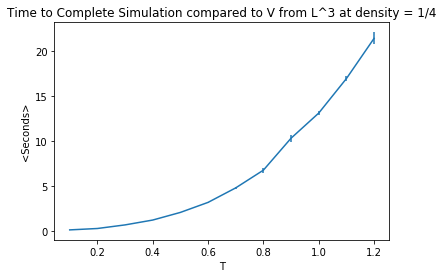

In [173]:
times = []
for L in Length :
    times.append((numpy.average(results[L][:,2]),numpy.std(results[L][:,2])))
times = numpy.array(times)
plt.errorbar(Temps,times[:,0],times[:,1])
plt.xlabel("L")
plt.ylabel("<Seconds>")
plt.title('Time to Complete Simulation compared to V from L^3 at density = 1/4')

KeyError: 50

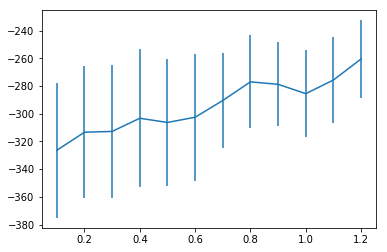

In [176]:
plt.errorbar(Temps,results[1][:,0],results[10][:,1])
plt.errorbar(Temps,results[5][:,0],results[5][:,1])
plt.errorbar(Temps,results[9][:,0],results[9][:,1])
plt.errorbar(Temps,results[11][:,0],results[11][:,1])
plt.xlabel("L")
plt.ylabel("<U>")

In [202]:
# Cv
# variance is std^2
f = U.shape
q = Temps.shape
ep = results.shape

#print(Temps)
#print(numpy.var(U[:]))
#print(U**2);
#print(U)
#print(numpy.square(U));
print(f)
print(q)
print(ep)
print(results)
#for i,val in enumerate(Temps):
#    print(i,val)
#    Cv = (1/(Temps[val]^2))*(numpy.var(results[10][:,0]))


AttributeError: 'dict' object has no attribute 'shape'

In [ ]:
#THIS IS THE RDF SCRIPT

import numpy
import matplotlib.pyplot as plt
%matplotlib inline
N = 400 
L = 10
Lmin=-L/2
Lmax = L/2
V = L*L
coords=numpy.random.uniform(low=Lmin, high=Lmax, size=(N,2))
dr = 0.01

plt.scatter(coords[:,0],coords[:,1])
plt.xlim([Lmin,Lmax])
plt.ylim([Lmin,Lmax])
plt.grid()
plt.axes().set_aspect("equal")

In [ ]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
N = 400 
L = 10
Lmin=-L/2
Lmax = L/2
V = L*L
coords=numpy.random.uniform(low=Lmin, high=Lmax, size=(N,2))
dr = 0.01

plt.scatter(coords[:,0],coords[:,1])
plt.xlim([Lmin,Lmax])
plt.ylim([Lmin,Lmax])
plt.grid()
plt.axes().set_aspect("equal")

In [79]:
analyze(U)

(-2.3566, 0.04902904656841091)

In [61]:
#plt.plot(numpy.array(U)/len(occupied),N)
print(U)
print(times)
print(numpy.sum(U))
print(numpy.sum(U)/len(U))

[-1.05  -1.05  -1.05  -1.05  -1.05  -1.075 -1.075 -1.075 -1.125 -1.125
 -1.125 -1.075 -1.075 -1.075 -1.075 -1.075 -1.075 -1.075 -1.15  -1.15
 -1.15  -1.15  -1.15  -1.175 -1.175 -1.2   -1.2   -1.175 -1.175 -1.2
 -1.2   -1.2   -1.2   -1.2   -1.2   -1.2   -1.225 -1.225 -1.225 -1.225
 -1.225 -1.225 -1.225 -1.225 -1.275 -1.275 -1.275 -1.275 -1.275 -1.275
 -1.275 -1.275 -1.275 -1.275 -1.275 -1.275 -1.275 -1.275 -1.275 -1.3
 -1.325 -1.325 -1.325 -1.325 -1.325 -1.325 -1.325 -1.325 -1.325 -1.325
 -1.325 -1.375 -1.375 -1.35  -1.35  -1.35  -1.35  -1.35  -1.35  -1.35
 -1.35  -1.325 -1.325 -1.35  -1.35  -1.35  -1.35  -1.35  -1.35  -1.35
 -1.35  -1.375 -1.375 -1.375 -1.375 -1.375 -1.375 -1.375 -1.375 -1.4
 -1.425 -1.45  -1.45  -1.45  -1.45  -1.5   -1.5   -1.525 -1.5   -1.5
 -1.5   -1.5   -1.5   -1.5   -1.5   -1.525 -1.525 -1.525 -1.525 -1.525
 -1.525 -1.525 -1.5   -1.525 -1.525 -1.5   -1.5   -1.525 -1.525 -1.525
 -1.525 -1.525 -1.525 -1.525 -1.55  -1.55  -1.55  -1.55  -1.5   -1.575
 -1.575 -1.55  -1

In [30]:
N=10
L=5
lattice = numpy.zeros((L,L,L),dtype=numpy.int8)#Initialize empty lattice
occupied = numpy.random.choice(L*L*L,N,replace=False)
print(occupied)
for i,site in enumerate(occupied):
    z,x,y = to3D(site,L)
    lattice[z][x][y] = i+1
    print(site)
    print(z,x,y)
print(lattice)

[ 84  10  33 123  83   2 115  81  22 111]
84
3 1 4
10
0 2 0
33
1 1 3
123
4 4 3
83
3 1 3
2
0 0 2
115
4 3 0
81
3 1 1
22
0 4 2
111
4 2 1
[[[ 0  0  6  0  0]
  [ 0  0  0  0  0]
  [ 2  0  0  0  0]
  [ 0  0  0  0  0]
  [ 0  0  9  0  0]]

 [[ 0  0  0  0  0]
  [ 0  0  0  3  0]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]]

 [[ 0  0  0  0  0]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]]

 [[ 0  0  0  0  0]
  [ 0  8  0  5  1]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]]

 [[ 0  0  0  0  0]
  [ 0  0  0  0  0]
  [ 0 10  0  0  0]
  [ 7  0  0  0  0]
  [ 0  0  0  4  0]]]


In [31]:
U = 0
L = len(lattice)
for site in occupied: #loop over all sites
    for neighbor in adjacent(site,L)[:3]: #Look right, down, and front so we  don't double count
        print(adjacent(site,L)[:6])
        print(occupied)
        if lattice[neighbor//(L*L)][((neighbor//(L*L))-(z*L*L))//L][(neighbor//(L*L)-(z*L*L))%L] != 0:
                U+=epsilon
                print("U")
                print["hello"]

(80, 89, 109, 83, 79, 59)
[ 84  10  33 123  83   2 115  81  22 111]


IndexError: index -20 is out of bounds for axis 0 with size 5

In [32]:
#nested loop testing
x=[]
y=[]
for i in range(1,3):
    x.append(i)
    i = i+1
    for j in range(20,25):
        y.append(j)
        print(x)
        print(y)
        j=j+1

[1]
[20]
[1]
[20, 21]
[1]
[20, 21, 22]
[1]
[20, 21, 22, 23]
[1]
[20, 21, 22, 23, 24]
[1, 2]
[20, 21, 22, 23, 24, 20]
[1, 2]
[20, 21, 22, 23, 24, 20, 21]
[1, 2]
[20, 21, 22, 23, 24, 20, 21, 22]
[1, 2]
[20, 21, 22, 23, 24, 20, 21, 22, 23]
[1, 2]
[20, 21, 22, 23, 24, 20, 21, 22, 23, 24]


In [509]:
site = 51
L = 5
z = site//(L*L)
sitexy = site - (z*L*L)
y = sitexy%L
x = sitexy//L
print(z)
print(z*L*L)
print(sitexy)


2
50
1


In [547]:
L=len(lattice)
V = L*L*L
Uo = energy(occupied,lattice)
print(Uo)
numpy.random.shuffle(occupied) #shuffles the elements of occupied
old = occupied[0]
empty_mask = numpy.isin(numpy.arange(V),occupied,invert=True)
empty_sites = numpy.arange(V)[empty_mask] # list of empty sites
new = empty_sites[numpy.random.randint(len(empty_sites))]
occupied[0]= new
lattice[new//(L*L)][((new//(L*L))-(z*L*L))//L][(new//(L*L)-(z*L*L))%L] = lattice[old//(L*L)][((old//(L*L))-(z*L*L))//L][(old//(L*L)-(z*L*L))%L]
lattice[old//(L*L)][((old//(L*L))-(z*L*L))//L][(old//(L*L)-(z*L*L))%L] = 0
Un = energy(occupied,lattice)
print(Un)
print(lattice)
if (Un<=Uo) or numpy.random.random() < numpy.exp(-(Un-Uo)/T):
    return occupied, lattice, Un
    lattice[old//(L*L)][((old//(L*L))-(z*L*L))//L][(old//(L*L)-(z*L*L))%L] = attice[new//(L*L)][((new//(L*L))-(z*L*L))//L][(new//(L*L)-(z*L*L))%L]
    attice[new//(L*L)][((new//(L*L))-(z*L*L))//L][(new//(L*L)-(z*L*L))%L] = 0
    occupied[0]=old



-8
-5
[[[  0   0   0   0   0]
  [  0   0   0   0   0]
  [  0   0   0   0   0]
  [  0   0  17   0   0]
  [  0   0   0   0   0]]

 [[  0   0   0   0   0]
  [  0   0   0   0   0]
  [  0   0   0   0   0]
  [  0   0   0   0   0]
  [  0   0   0   0  49]]

 [[  0   0 104   0   0]
  [  0   0   0   0   0]
  [  0   0   0   0   0]
  [  0   0   0   0   0]
  [  0   0  72   0   0]]

 [[  0   0   0   0   0]
  [  0   0  82   0   0]
  [  0  86   0   0   0]
  [  0   0   0   0   0]
  [  0   0  97  98   0]]

 [[  0   0   0   0   0]
  [  0   0   0   0   0]
  [  0   0   0   0   0]
  [  0   0   0   0   0]
  [120   0   0   0   0]]]


SyntaxError: 'return' outside function (<ipython-input-547-a267605f963a>, line 17)

In [515]:
U = 0
L = len(lattice)
for site in occupied: #loop over all sites
    for neighbor in adjacent(site,L)[:3]: #Look right,down, front to avoid double counting
        if lattice[neighbor//(L*L)][((neighbor//(L*L))-(z*L*L))//L][(neighbor//(L*L)-(z*L*L))%L] != 0:
            U+=epsilon

IndexError: index -20 is out of bounds for axis 0 with size 10

In [70]:
L=len(lattice)
V = L*L*L
Uo = energy(occupied,lattice)
numpy.random.shuffle(occupied) #shuffles the elements of occupied
old = occupied[0]
empty_mask = numpy.isin(numpy.arange(V),occupied,invert=True)
empty_sites = numpy.arange(V)[empty_mask] # list of empty sites
new = empty_sites[numpy.random.randint(len(empty_sites))]
occupied[0]= new
lattice[new//(L*L)][((new//(L*L))-(z*L*L))//L][(new//(L*L)-(z*L*L))%L] = lattice[old//(L*L)][((old//(L*L))-(z*L*L))//L][(old//(L*L)-(z*L*L))%L]
lattice[old//(L*L)][((old//(L*L))-(z*L*L))//L][(old//(L*L)-(z*L*L))%L] = 0
Un = energy(occupied,lattice)
if (Un<=Uo) or numpy.random.random() < numpy.exp(-(Un-Uo)/T):
    print(occupied, lattice, Un)
lattice[old//(L*L)][((old//(L*L))-(z*L*L))//L][(old//(L*L)-(z*L*L))%L] = lattice[new//(L*L)][((new//(L*L))-(z*L*L))//L][(new//(L*L)-(z*L*L))%L]
lattice[new//(L*L)][((new//(L*L))-(z*L*L))//L][(new//(L*L)-(z*L*L))%L] = 0
occupied[0]=old



IndexError: index -20 is out of bounds for axis 0 with size 5

In [ ]:
if (Un<=Uo) or numpy.random.random() < numpy.exp(-(Un-Uo)/T):
    return occupied, lattice, Un
lattice[old//(L*L)][((old//(L*L))-(z*L*L))//L][(old//(L*L)-(z*L*L))%L] = lattice[new//(L*L)][((new//(L*L))-(z*L*L))//L][(new//(L*L)-(z*L*L))%L]
lattice[new//(L*L)][((new//(L*L))-(z*L*L))//L][(new//(L*L)-(z*L*L))%L] = 0
occupied[0]=old


In [4]:
U = 0
epsilon = -1
L = 5
#print(lattice)
print(occupied)
for site in occupied: #loop over all sites
    for neighbor in adjacent(site,L)[:3]: #Look right,down, front to avoid double counting
        z,x,y = to3D(neighbor,L) # this finds the z,y,x coordinate of the site wrt the site number
        print(z,x,y)
        #print(site)
        #print(adjacent(site,L)[:3])
        #print(z,x,y,L)
        #print("neighbor "+str(neighbor))
        #print((neighbor-(z*L*L))%L)
        #print("z is "+str((neighbor//(L*L))))
        #print("x is "+str((neighbor-(z*L*L))//L))
        #print("y is "+str((neighbor-(z*L*L))%L))
        if lattice[neighbor//(L*L)][(neighbor-(z*L*L))//L][(neighbor-(z*L*L))%L] != 0:
            U+=epsilon
            print(U)
                

[ 16  66  41  81  61  11  99  38  49 120]
0 3 2
0 4 1
1 3 1
-1
2 3 2
2 4 1
3 3 1
1 3 2
1 4 1
2 3 1
-2
3 1 2
3 2 1
4 1 1
2 2 2
2 3 1
-3
3 2 1
0 2 2
0 3 1
-4
1 2 1
3 4 0
3 0 4
4 4 4
1 2 4
1 3 3
2 2 3
1 4 0
1 0 4
2 4 4
4 4 1
4 0 0
0 4 0


In [59]:
adjacent(116,5)[:]

(117, 121, 16, 115, 111, 91)

In [57]:
106//(L*L)

4

In [82]:
print(z)
(106-(z*L*L))%L

2


1

In [64]:
(106-(z*L*L))//L

1

In [95]:
neighbor=5
z=4
print(z,L)
print((neighbor-(z*L*L))//L)


4 5
-19


In [53]:
(116-(4*5*5))//5

3

In [50]:
(116-(4*5*5))%5

1

In [62]:
to3D(116,5)

(4, 3, 1)

occupied,lattice = init(25,5)

In [13]:
occupied,lattice = init(124,5)

In [14]:
trial_move(occupied,lattice,0.5)

(array([  1,  21, 112,  12,  16,  75, 107,  69,  79,  61,  37,  19, 115,
         30,  81,  93,  74, 117,   9,  66,  17,  47, 110,  57,  39,  78,
         18,  60,  13,  28,   5,  95,  98, 121,  80, 100, 103,   6,  67,
        106,  65,  84,  62,  99, 104,  53,  77,  29,   7,  46,   8,  91,
        122,  90,  48,  35,  89,  25,   2, 123,  73, 119, 120,   0, 105,
         23,  24,  59,  70,  36,  14,  96,  44, 116,   3,  71,  42,  32,
         26,  83,  10,  45,  22,  41,  94, 102,  92,  55,  56, 111,  15,
        108,  58,  34,  33,  27,  86,  85,   4,  63,  87,  64,  52, 118,
         49, 101,  50,  40,  11,  38, 124,  43,  54, 113, 114,  68,  20,
         97,  72,  31,  88,  51,  76, 109]), array([[[102,  71, 108,   4,  81],
         [ 75,  67,  54,  35,  89],
         [123,  64,  11,  97,   2],
         [ 93, 117,  43,  49,  45],
         [112, 103,  70, 124,  96]],
 
        [[ 83,  84, 107,  78,  61],
         [ 69,  42,   9, 118,  98],
         [ 39,  27,   6,  58, 120],
        

In [15]:
-369/124

-2.975806451612903

In [19]:
U = run(1e3,T,occupied, lattice)

TypeError: cannot unpack non-iterable NoneType object

In [126]:
 U = []
    for step in range(int(nsteps)):
        occupied, lattice, u = trial_move(occupied, lattice,T)
        U.append(u)
    return numpy.array(U)/len(occupied)

IndentationError: unexpected indent (<ipython-input-126-25a9a69a82ab>, line 2)

In [127]:
9//5

1

In [128]:
9%5


4